# You are playing a game vs A. A can only randomly choose any integer from 0 to 100. You can choose any number in the range. The person who chooses the highest number loses, and pays the other the number (the winner) chose. What is your strategy? What if a second player, who can also choose like you, joins the game?

'The person who chooses the highest number loses'

- The highest number A can choose is 100
- I assume I don't know A choose before I choose my number... But in case I know it, I would choose the maximum number below that one.
- As in the previous game, I assume any integer has the same probability to be chosen. In that case, again, I will chose 49, given that A will chose a number above 49 most of the times (and, consequently, will lose most of the times). 49 is the highest value below the most probable A's outcomes, so I will have more profit by choosing 49 than by choosing any other number below. That would be the case we play the game many times. In case we play a few times, perhaps I would like to choose a number below 5, given that with 95% confidence, A will chose a number equal or higher than 5...



'What if a second player, who can also choose like you, joins the game?'

- Would that person also choose 49 always? In that case I will choose 48.

- Would that person also choose 41 always? In that case I will choose 40.

- And if not, what is the difference with the previous question?

see below for some simulations

In [81]:
import numpy as np
import matplotlib.pyplot as plt
# Let's simulate in case B is always 49
upLIM = 101
N = 1000 # number of simulations
#C = np.zeros((upLIM, upLIM, N)) # vector to save my choices
W = np.zeros(upLIM) #  to save my winnings/number
B = 49 # B choses the optimal number wrt A
for j in range(upLIM): # loop for my choices
    C = j # this assumes I don't know any previous output, and I choose a given number in the limit
    for k in range(N): # loop for N games
        A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100
        if C>B and C>A: # If I choose the biggest number, I pay the others their choices
            W[j] += -A-B
        if C<B or C<A: # If there is any number bigger than mine, that player will pay me my chosen number
            W[j] += C

In [82]:
# Which number maximizes my earnings?
np.argmax(W)

48

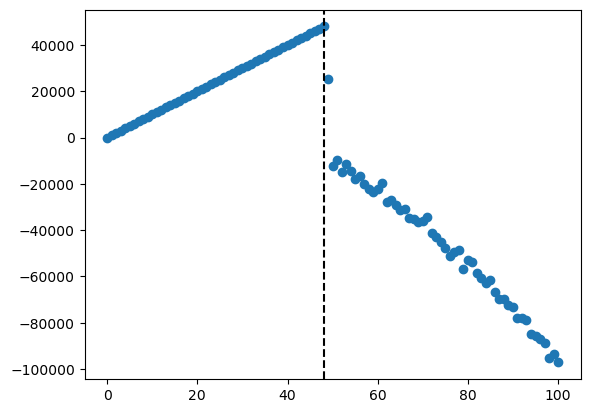

In [83]:
# Let's see the distribution of W
plt.scatter(np.arange(101),W)
plt.axvline(np.argmax(W), linestyle='--',c='k')

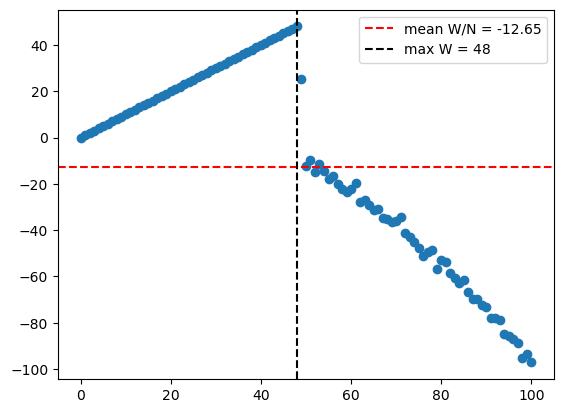

In [86]:
# Let's see the distribution of W normalized
plt.scatter(np.arange(101),W/N)
plt.axhline(np.mean(W/N), linestyle='--', color='red', label='mean W/N = %.2f'%np.mean(W/N))
plt.axvline(np.argmax(W), linestyle='--',c='k', label=f'max W = {np.argmax(W)}')
plt.legend()


As mentioned, 48 will be the best number to choose in case B choses 49.
Now let's suppose B choses 41, the best number we found before, and let's see what happens.

In [87]:
# Let's simulate in case B is always 41
upLIM = 101
N = 1000 # number of simulations
#C = np.zeros((upLIM, upLIM, N)) # vector to save my choices
W = np.zeros(upLIM) #  to save my winnings/number
B = 41 # B choses the optimal number wrt A
for j in range(upLIM): # loop for my choices
    C = j # this assumes I don't know any previous output, and I choose a given number in the limit
    for k in range(N): # loop for N games
        A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100
        if C>B and C>A: # If I choose the biggest number, I pay the others their choices
            W[j] += -A-B
        if C<B or C<A: # If there is any number bigger than mine, that player will pay me my chosen number
            W[j] += C

In [88]:
# which number maximizes W?
np.argmax(W)

40

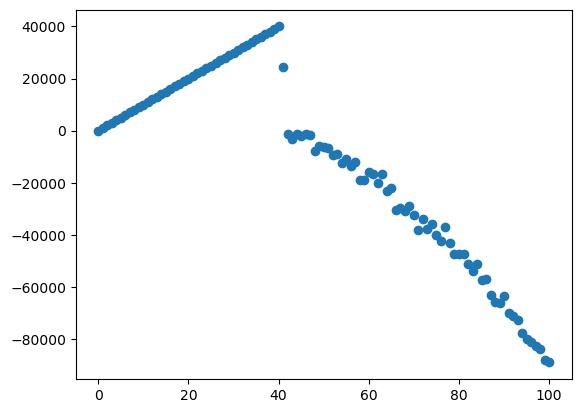

In [89]:
# Let's see the distribution of W
plt.scatter(np.arange(101),W)

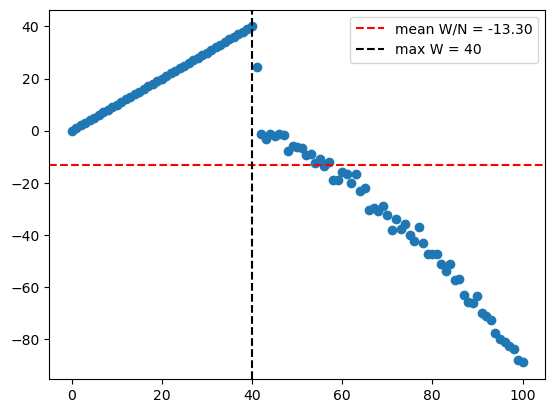

In [90]:
# Let's see the distribution of W normalized
plt.scatter(np.arange(101),W/N)
plt.axhline(np.mean(W/N), linestyle='--', color='red', label='mean W/N = %.2f'%np.mean(W/N))
plt.axvline(np.argmax(W), linestyle='--',c='k', label=f'max W = {np.argmax(W)}')
plt.legend()

What if I choose the best number given A's choice? Well... given that A's choice is random, mine will be random as well

In [91]:
# Let's simulate in case there's only me and A, and I choose the number that gives me the maximum profit based on 
# A's choice
upLIM = 101
N = 1000 # number of simulations
#C = np.zeros((upLIM, upLIM, N)) # vector to save my choices
W = np.zeros(upLIM) #  to save my winnings/number
for j in range(upLIM): # loop for my choices
    for k in range(N): # loop for N games
        A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100
        if A>0:
            C = A-1 # If I choose the biggest number below A's choice, A will pay me that amount
            W[j] += C

In [92]:
# Which number maximizes my earnings?
np.argmax(W)

28

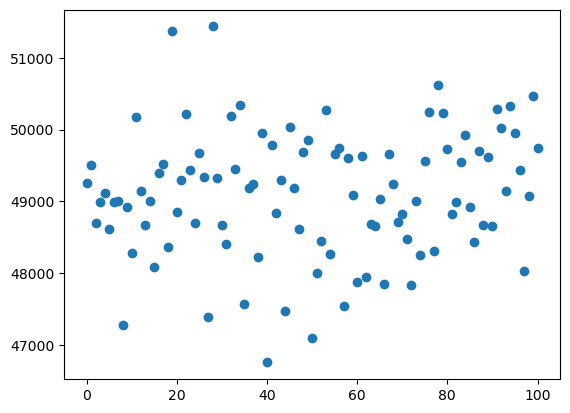

In [93]:
# Let's see the distribution of earning per chosen number
plt.scatter(np.arange(101),W)

W's distribution has not a deterministic maximum as in previous cases. However, if we normalize W, we see the mean near 49, as also stated previously, i.e., we expect to win 49 most of the times.

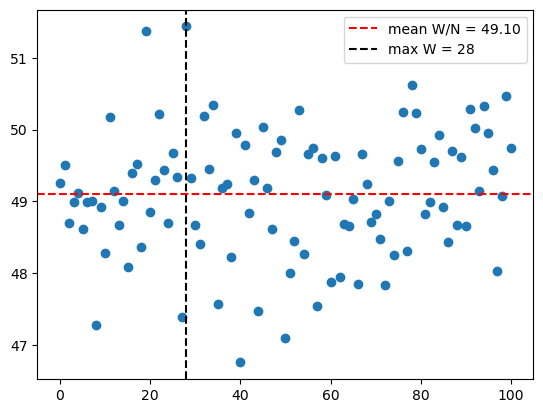

In [94]:
# Let's see the normalized distribution of earning per chosen number
plt.scatter(np.arange(101),W/N)
plt.axhline(np.mean(W/N), linestyle='--', color='red', label='mean W/N = %.2f'%np.mean(W/N))
plt.axvline(np.argmax(W), linestyle='--',c='k', label=f'max W = {np.argmax(W)}')
plt.legend()

is there a way to maximize the mean of W?